### Visualize perovskite energy level alignment

In [ ]:
%matplotlib inline
import sys
sys.path.append('../03-code/')
from config import PROJECT_ROOT_DIRECTORY, IDENTIFIER_DICT, COLOR_PALETTE
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
from seaborn import axes_style

In [ ]:
organic_genome_dataframe = pd.read_csv(
    PROJECT_ROOT_DIRECTORY + '02-metadata/06-csv-files/01-organic-genome.csv', index_col='identifier'
)
hse_frontier_dataframe = pd.read_csv(
    PROJECT_ROOT_DIRECTORY + '02-metadata/06-csv-files/08-hse-frontier.csv', index_col='identifier'
)
structure_info_dataframe = pd.read_csv(
    PROJECT_ROOT_DIRECTORY + '02-metadata/06-csv-files/07-structure-info.csv', index_col='identifier'
)

organic_dimension_dataframe = pd.read_csv(
      PROJECT_ROOT_DIRECTORY + '02-metadata/06-csv-files/06-organic-dimension.csv', index_col='identifier'  
)

mo_energetics_dataframe = pd.read_csv(
    PROJECT_ROOT_DIRECTORY + '02-metadata/06-csv-files/04-mo-energetics.csv', index_col='identifier'  
)

organic_fingerprints_dataframe = pd.read_csv(
    PROJECT_ROOT_DIRECTORY + '02-metadata/06-csv-files/02-organic-fingerprints.csv', index_col='identifier'  
)


In [3]:
dataframe = pd.concat([organic_genome_dataframe, hse_frontier_dataframe, structure_info_dataframe, mo_energetics_dataframe, organic_fingerprints_dataframe], axis=1)
dataframe_gen0_2 = dataframe.loc[IDENTIFIER_DICT['gen_0'] + IDENTIFIER_DICT['gen_1'] + IDENTIFIER_DICT['gen_2']].reset_index()
dataframe_exist = dataframe.loc[IDENTIFIER_DICT['existing']].reset_index()
dataframe_final = dataframe.loc[IDENTIFIER_DICT['typeII_a'] + IDENTIFIER_DICT['typeII_b']+ IDENTIFIER_DICT['typeI_b']].reset_index()

In [ ]:
dataframe_gen0_2_melt = pd.melt(
    dataframe_gen0_2, id_vars=['generation', 'identifier'],
    value_vars=['inorganic_cbm_z', 'inorganic_vbm_z', 'organic_LUMO', 'organic_HOMO'],
    var_name='type', value_name='energy'
)

dataframe_exist_melt = pd.melt(
    dataframe_exist, id_vars=['generation','identifier'],
    value_vars=['inorganic_cbm_z', 'inorganic_vbm_z', 'organic_LUMO', 'organic_HOMO'],
    var_name='type', value_name='energy'
)

dataframe_final_melt = pd.melt(
    dataframe_final, id_vars=['generation','identifier'],
    value_vars=['inorganic_cbm_z', 'inorganic_vbm_z', 'organic_LUMO', 'organic_HOMO'],
    var_name='type', value_name='energy'
)
dataframe_gen0_2_melt['generation'] = 'expanded'
dataframe_exist_melt['generation'] = 'exist'
dataframe_final_melt['generation'] = 'expanded'
dataframe_m = pd.concat([dataframe_gen0_2_melt, dataframe_exist_melt, dataframe_final_melt], axis=0, ignore_index=True)
#dataframe_m = dataframe_m.replace({'inorganic_cbm_z': 'Inorganic', 'inorganic_vbm_z': 'Inorganic',
#                       'organic_LUMO': 'Organic', 'organic_HOMO': 'Organic'})

dataframe_m[['material_type', 'property']] = dataframe_m['type'].str.extract(r'(inorganic|organic)_(cbm_z|vbm_z|LUMO|HOMO)')

# Replace values in the 'property' column
dataframe_m['property'] = dataframe_m['property'].replace({
    'cbm_z': 'unfill',
    'LUMO': 'unfill',
    'vbm_z': 'fill',
    'HOMO': 'fill'
})

fig, ax = plt.subplots(figsize=(4,6))
#sns.despine(bottom=True, left=True)
(
    so.Plot(dataframe_m.sort_values(by=['generation','material_type','property']), 
            x = "material_type", y= "energy", group='generation',# marker='material_type', 
            color='generation')
    .add(so.Dots(fillalpha=0.6), so.Dodge(by='generation'), so.Jitter(.2), fill='property')
    .scale(color={'exist':'#bf812d', 'expanded':'#35978f'})
    .theme(axes_style("whitegrid"))
    .on(ax)
    .plot()
)
ax.set_ylabel('Energy (eV)')
fig#.savefig('../rawfigures/energy-level-alignment-new.svg')

### Plot Figure 3

Text(0.5, 0, 'Interlayer distance (angstrom)')

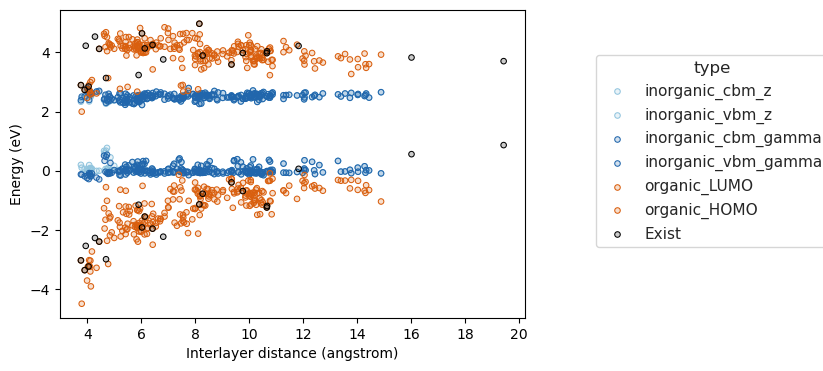

In [138]:
# Melted DataFrame preparation
dataframe_gen0_2_melt = pd.melt(
    dataframe_gen0_2, id_vars=['d_interlayer','generation', 'identifier'],
    value_vars=['inorganic_cbm_z', 'inorganic_vbm_z', 'inorganic_cbm_gamma', 'inorganic_vbm_gamma', 'organic_LUMO', 'organic_HOMO'],
    var_name='type', value_name='energy'
)
dataframe_exist_melt = pd.melt(
    dataframe_exist, id_vars=['d_interlayer','generation','identifier'],
    value_vars=['organic_LUMO', 'organic_HOMO'],
    var_name='type', value_name='energy'
)
dataframe_final_melt = pd.melt(
    dataframe_final, id_vars=['d_interlayer','generation','identifier'],
    value_vars=['inorganic_cbm_z', 'inorganic_vbm_z', 'inorganic_cbm_gamma', 'inorganic_vbm_gamma', 'organic_LUMO', 'organic_HOMO'],
    var_name='type', value_name='energy'
)

dataframe_exist_melt['type'] = 'Exist'
#dataframe_final_melt['type'] = 'Final'
dataframe_m = pd.concat([dataframe_gen0_2_melt,
                         #dataframe_final_melt, 
                         dataframe_exist_melt], axis=0)



p= (
    so.Plot(data=dataframe_m.reset_index(), x='d_interlayer', y='energy',color='type')
    .add(so.Dots())
    .scale(color={"inorganic_cbm_z":'#92c5de', 'inorganic_vbm_z':'#92c5de',
                  'inorganic_cbm_gamma': '#2166ac', 'inorganic_vbm_gamma': '#2166ac',
                  'organic_LUMO': '#d95f0e', 'organic_HOMO': '#d95f0e',
                  'Exist': 'black'})
    .theme(axes_style('ticks'))
)

fig, ax = plt.subplots(figsize=(6,4))
p.on(ax).plot()
ax.set_ylabel('Energy (eV)')
ax.set_xlabel('Interlayer distance (angstrom)')

#fig.savefig('../rawfigures/energy-level-alignment.svg')


In [4]:
dataframe_gen0_2['organic_HOMO_LUMO_gap'] = dataframe_gen0_2['organic_LUMO'] - dataframe_gen0_2['organic_HOMO']
dataframe_gen0_2['iodide_interaction'] =dataframe_gen0_2['inorganic_cbm_gamma'] - dataframe_gen0_2['inorganic_cbm_z'] - dataframe_gen0_2['inorganic_vbm_gamma'] + dataframe_gen0_2['inorganic_vbm_z']
dataframe_gen0_2['inorganic_bandgap'] = dataframe_gen0_2['inorganic_cbm_gamma'] - dataframe_gen0_2['inorganic_vbm_gamma']

In [9]:
dataframe_gen0_2.corr(numeric_only=True)

,identifier,generation,inorganic_cbm_gamma,inorganic_cbm_z,inorganic_vbm_gamma,inorganic_vbm_z,organic_LUMO,organic_HOMO,d_interlayer,bond_average,...,linker_position,hetero_nitrogen,fluorination,furan,pyrrole,sidechain_on_linker,sidechain_on_backbone,organic_HOMO_LUMO_gap,iodide_interaction,inorganic_bandgap
identifier,1.000000,0.157592,0.013530,0.024208,0.071856,0.029194,0.180522,-0.051897,-0.134952,0.183729,...,-0.108882,-0.013362,-0.021223,-0.060048,-0.062022,0.043721,0.617316,0.169308,-0.090687,-0.042564
generation,0.157592,1.000000,0.076916,0.078177,0.033517,0.032968,-0.086707,0.114796,0.118469,0.075033,...,-0.031481,0.071608,0.071608,0.036060,0.036060,0.035464,0.071608,-0.173138,0.001208,0.014505
inorganic_cbm_gamma,0.013530,0.076916,1.000000,0.992044,-0.443673,-0.389252,-0.250612,0.000888,0.230189,0.237024,...,0.209535,-0.163638,-0.040101,-0.086770,-0.081007,0.138829,0.001073,-0.162343,0.093650,0.790102
inorganic_cbm_z,0.024208,0.078177,0.992044,1.000000,-0.425905,-0.421461,-0.192576,0.083329,0.290951,0.238995,...,0.227376,-0.166768,-0.030842,-0.082189,-0.076362,0.148059,0.008806,-0.209186,-0.022947,0.774077
inorganic_vbm_gamma,0.071856,0.033517,-0.443673,-0.425905,1.000000,0.901411,0.274077,0.300515,0.043600,0.449001,...,-0.513272,0.067158,-0.089302,-0.001919,-0.034485,-0.170310,-0.000116,-0.130476,-0.137680,-0.899888
inorganic_vbm_z,0.029194,0.032968,-0.389252,-0.421461,0.901411,1.000000,0.088600,0.019400,-0.167634,0.443711,...,-0.583904,0.064283,-0.112656,-0.022113,-0.053277,-0.183643,-0.030069,0.037252,0.303523,-0.805972
organic_LUMO,0.180522,-0.086707,-0.250612,-0.192576,0.274077,0.088600,1.000000,0.348538,-0.024476,0.117836,...,-0.182920,-0.070543,0.030702,0.108250,0.159874,0.133945,0.154902,0.288075,-0.417186,-0.309421
organic_HOMO,-0.051897,0.114796,0.000888,0.083329,0.300515,0.019400,0.348538,1.000000,0.720474,0.101997,...,0.068169,-0.281068,-0.172623,0.069994,0.147259,-0.110568,-0.031765,-0.797156,-0.629136,-0.205114
d_interlayer,-0.134952,0.118469,0.230189,0.290951,0.043600,-0.167634,-0.024476,0.720474,1.000000,-0.067711,...,0.263327,-0.175740,-0.137552,-0.023046,-0.020417,-0.090879,-0.113493,-0.751855,-0.483089,0.082197
bond_average,0.183729,0.075033,0.237024,0.238995,0.449001,0.443711,0.117836,0.101997,-0.067711,1.000000,...,-0.406569,-0.178668,-0.126062,-0.066009,-0.087050,0.293357,0.122859,-0.028302,0.028163,-0.191763


In [12]:
dataframe_gen0_2.query('ringcount == 3').corr(numeric_only=True)

,identifier,generation,inorganic_cbm_gamma,inorganic_cbm_z,inorganic_vbm_gamma,inorganic_vbm_z,organic_LUMO,organic_HOMO,d_interlayer,bond_average,...,linker_position,hetero_nitrogen,fluorination,furan,pyrrole,sidechain_on_linker,sidechain_on_backbone,organic_HOMO_LUMO_gap,iodide_interaction,inorganic_bandgap
identifier,1.000000,NaN,0.159380,0.159380,-0.227142,-0.227142,-0.314758,-0.048437,0.030590,-0.276117,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.179712,NaN,0.251191
generation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
inorganic_cbm_gamma,0.159380,NaN,1.000000,1.000000,-0.239007,-0.239007,-0.146783,-0.175091,0.051825,0.146494,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.012157,NaN,0.587826
inorganic_cbm_z,0.159380,NaN,1.000000,1.000000,-0.239007,-0.239007,-0.146783,-0.175091,0.051825,0.146494,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.012157,NaN,0.587826
inorganic_vbm_gamma,-0.227142,NaN,-0.239007,-0.239007,1.000000,1.000000,0.450679,0.205440,-0.250927,0.830304,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.171684,NaN,-0.926036
inorganic_vbm_z,-0.227142,NaN,-0.239007,-0.239007,1.000000,1.000000,0.450679,0.205440,-0.250927,0.830304,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.171684,NaN,-0.926036
organic_LUMO,-0.314758,NaN,-0.146783,-0.146783,0.450679,0.450679,1.000000,-0.188124,-0.118236,0.427654,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.786165,NaN,-0.432531
organic_HOMO,-0.048437,NaN,-0.175091,-0.175091,0.205440,0.205440,-0.188124,1.000000,-0.210267,0.165697,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.754879,NaN,-0.239217
d_interlayer,0.030590,NaN,0.051825,0.051825,-0.250927,-0.250927,-0.118236,-0.210267,1.000000,-0.313478,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.053354,NaN,0.229200
bond_average,-0.276117,NaN,0.146494,0.146494,0.830304,0.830304,0.427654,0.165697,-0.313478,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.181317,NaN,-0.634812


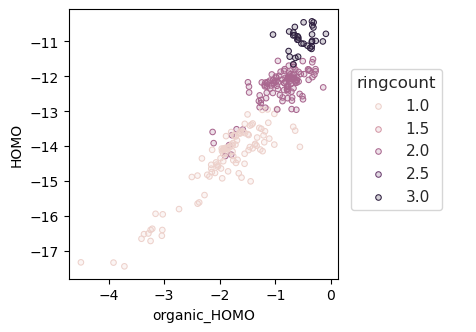

In [103]:
p1=(
    so.Plot(dataframe_gen0_2, x='organic_HOMO', y='HOMO',color='ringcount')
    .add(so.Dots())
    .theme(axes_style('ticks'))
)

p2=(
    so.Plot(dataframe_gen0_2, x='organic_LUMO', y='LUMO',color='ringcount')
    .add(so.Dots())
    .theme(axes_style('ticks'))
)
p3=(
    so.Plot(dataframe_gen0_2, x='organic_HOMO_LUMO_gap', y='HOMO_LUMO_gap',color='ringcount')
    .add(so.Dots())
    .theme(axes_style('ticks'))
    .limit(x=[3.0,7.0], y=[3.0,7.0])
)

fig, ax = plt.subplots(figsize=(3.5,3.5))
p1.on(ax).plot()
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
fig.savefig('../rawfigures/HOMO-LUMO-relationship-1.svg')


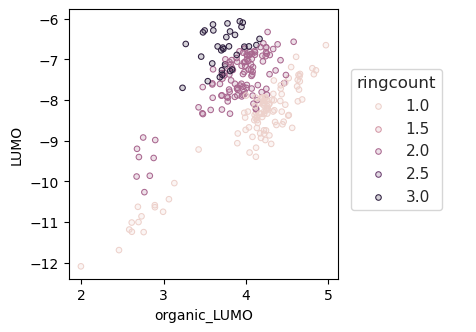

In [104]:
fig, ax = plt.subplots(figsize=(3.5,3.5))
p2.on(ax).plot()
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
fig.savefig('../rawfigures/HOMO-LUMO-relationship-2.svg')

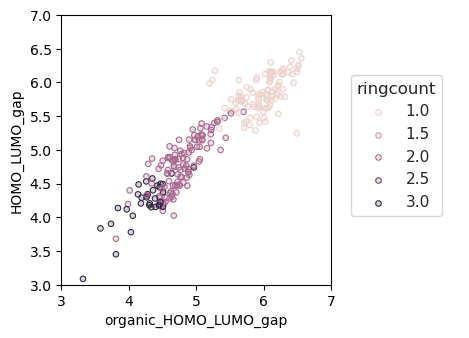

In [105]:
fig, ax = plt.subplots(figsize=(3.5,3.5))
p3.on(ax).plot()
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
fig.savefig('../rawfigures/HOMO-LUMO-relationship-3.svg')

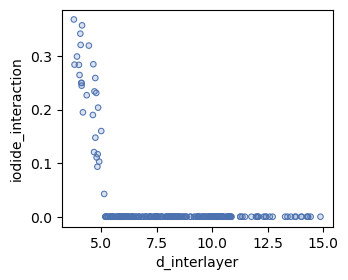

In [119]:
p4=(
    so.Plot(dataframe_gen0_2, x='d_interlayer', y='iodide_interaction')
    .add(so.Dots())
    .theme(axes_style('ticks'))
)
p5=(
    so.Plot(pd.melt(dataframe_gen0_2, id_vars='inorganic_bandgap', value_vars=['angleXMX_average', 'angleMXM_average']),
            x='value', y='inorganic_bandgap', color='variable')
    .add(so.Dots())
    .theme(axes_style('ticks'))
)
fig, ax = plt.subplots(figsize=(3.5,3.5))
p4.on(ax).plot()
ax.set_aspect(0.8/ax.get_data_ratio(), adjustable='box')
fig.savefig('../rawfigures/inorganic-band-edge-1.svg')


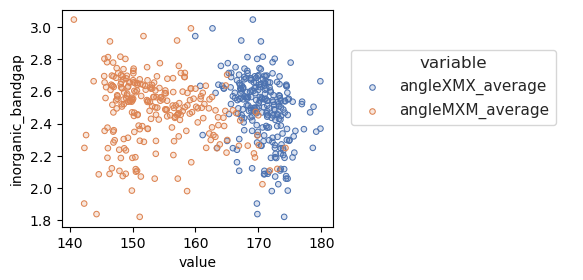

In [118]:
fig, ax = plt.subplots(figsize=(3.5,3.5))
p5.on(ax).plot()
ax.set_aspect(0.8/ax.get_data_ratio(), adjustable='box')
fig.savefig('../rawfigures/inorganic-band-edge-2.svg')

In [47]:
import numpy as np
def plot_energy_level_alignment_bars(dataframe_list, identifier_list, y_lim=(-2,5),figsize=(3,3)):
    dataframe = pd.concat(dataframe_list, axis=1)
    dataframe = dataframe.loc[identifier_list]
    dataframe['id_vars'] = np.arange(len(identifier_list))

    dataframe_m = pd.melt(
        dataframe, id_vars='id_vars', 
        value_vars=['inorganic_cbm_z','inorganic_vbm_z', 'inorganic_cbm_gamma','inorganic_vbm_gamma', 'organic_LUMO', 'organic_HOMO'],
        var_name='type', value_name='energy'       
    )
    dataframe_upper = pd.melt(
        dataframe, id_vars='id_vars', 
        value_vars=['inorganic_cbm_z', 'organic_LUMO'],
        var_name='type', value_name='energy',
    )
    dataframe_upper.replace('inorganic_cbm_z', 'inorganic_cbm_z_bar',inplace=True)
    dataframe_upper.replace('organic_LUMO', 'organic_LUMO_bar',inplace=True)

    dataframe_lower = pd.melt(
        dataframe, id_vars='id_vars', 
        value_vars=['inorganic_vbm_z', 'organic_HOMO'],
        var_name='type', value_name='energy'
    )
    dataframe_lower.replace('inorganic_vbm_z', 'inorganic_vbm_z_bar',inplace=True)
    dataframe_lower.replace('organic_HOMO', 'organic_HOMO_bar',inplace=True)

    bar_range=[-6,6]
    warm000 = COLOR_PALETTE['warm000']
    warm002 = COLOR_PALETTE['warm002']
    cold000 = COLOR_PALETTE['cold000']
    cold001 = COLOR_PALETTE['cold001']
    cold002 = COLOR_PALETTE['cold002']

    fig, ax = plt.subplots(figsize=figsize)

    (
        so.Plot(data=dataframe_m, x='id_vars', y='energy')
        .add(so.Bars(baseline=bar_range[1]), data=dataframe_upper, x='id_vars', y='energy',color='type')
        .add(so.Bars(baseline=bar_range[0]), data=dataframe_lower, x='id_vars', y='energy',color='type')
        .add(so.Dot(), data=dataframe_m, x='id_vars', y='energy', color='type')
        .theme(axes_style("ticks"))
        .limit(y=y_lim)
        .scale(color=[cold002, warm002, cold002, warm002, cold001, cold001, cold000, cold000, warm000, warm000])
        .on(ax)
        .plot()
    )

    return fig

In [17]:
organic_fingerprints_dataframe.query("ringcount == 3 and six_ring_p == 1 and linkage_p==0 and linker_length == 2 and primaryamine==2 and fluorination ==2 and hetero_nitrogen==0 and sidechain_on_linker ==0 and sidechain_on_backbone ==0")

,ringcount,linkage_p,six_ring_p,primaryamine,linker_length,linker_position,hetero_nitrogen,fluorination,furan,pyrrole,sidechain_on_linker,sidechain_on_backbone
identifier,,,,,,,,,,,,
27623,3,0.0,1.0,2,2,1.0,0,2,0,0,0,0
27624,3,0.0,1.0,2,2,1.0,0,2,0,0,0,0
27625,3,0.0,1.0,2,2,1.0,0,2,0,0,0,0
27626,3,0.0,1.0,2,2,1.0,0,2,0,0,0,0
27627,3,0.0,1.0,2,2,1.0,0,2,0,0,0,0
27628,3,0.0,1.0,2,2,1.0,0,2,0,0,0,0
27629,3,0.0,1.0,2,2,1.0,0,2,0,0,0,0
27639,3,0.0,1.0,2,2,1.0,0,2,0,0,0,0
27640,3,0.0,1.0,2,2,1.0,0,2,0,0,0,0


In [75]:
mo_energetics_dataframe.loc[3640:3660]

,HOMO,LUMO,HOMO_LUMO_gap
identifier,,,
3641,-11.0764,-6.69999,4.37641
3642,-11.0184,-6.91687,4.10153


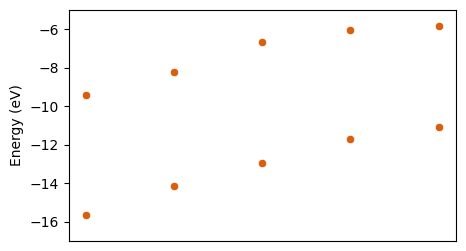

In [98]:
# benzene single ring
identifier_list_mo = [56,26,175,176,35849]
fig, ax = plt.subplots(figsize=(5,3))
sns.set_palette(sns.color_palette([COLOR_PALETTE['warm000'],COLOR_PALETTE['warm000']]))
sns.scatterplot(data=mo_energetics_dataframe.loc[identifier_list_mo],x=np.arange(len(identifier_list_mo)),y='HOMO',marker='o')
sns.scatterplot(data=mo_energetics_dataframe.loc[identifier_list_mo],x=np.arange(len(identifier_list_mo)),y='LUMO',marker='o')
ax.set(ylabel="Energy (eV)")
ax.get_xaxis().set_visible(False)
ax.set_ylim(-17, -5)
fig.savefig("../rawfigures/benzene_single_ring.svg")


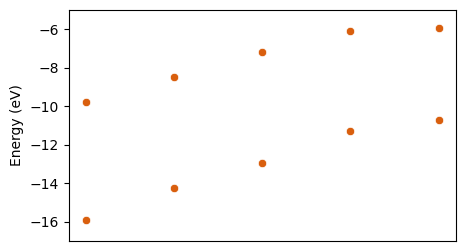

In [99]:
# thiophene single ring
identifier_list_mo = [81,4,173,174,35875]
fig, ax = plt.subplots(figsize=(5,3))
sns.set_palette(sns.color_palette([COLOR_PALETTE['warm000'],COLOR_PALETTE['warm000']]))
sns.scatterplot(data=mo_energetics_dataframe.loc[identifier_list_mo],x=np.arange(len(identifier_list_mo)),y='HOMO',marker='o')
sns.scatterplot(data=mo_energetics_dataframe.loc[identifier_list_mo],x=np.arange(len(identifier_list_mo)),y='LUMO',marker='o')
ax.set(ylabel="Energy (eV)")
ax.get_xaxis().set_visible(False)
ax.set_ylim(-17, -5)
fig.savefig("../rawfigures/thiophene_single_ring.svg")

In [ ]:
from utils import visualize_smiles_list
new_dataframe = pd.merge(organic_genome_dataframe, hse_frontier_dataframe, left_index=True, right_index=True)
visulization_dataframe = new_dataframe.iloc[400:450]
visualize_smiles_list(visulization_dataframe['smiles_canonical'].tolist(), legends=[f"{i}" for i in visulization_dataframe.index.tolist()])

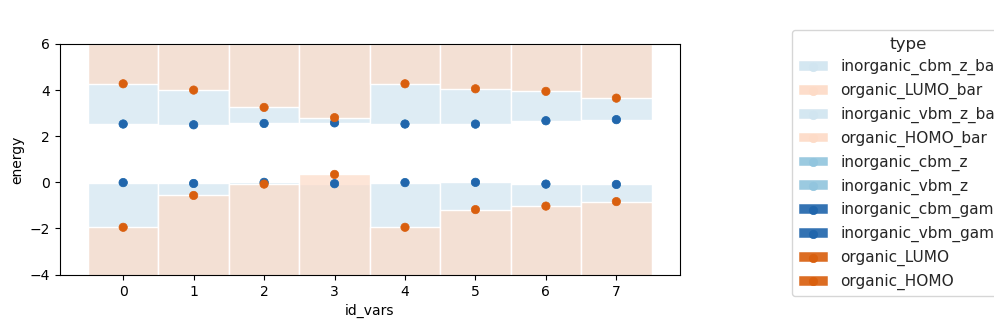

In [51]:
fig5 = plot_energy_level_alignment_bars([hse_frontier_dataframe,], identifier_list=[26,30,103,104,26,105,106,107],
                                        y_lim=(-4,6), figsize=(8,3))

#fig5.savefig('../rawfigures/energy-level.svg')

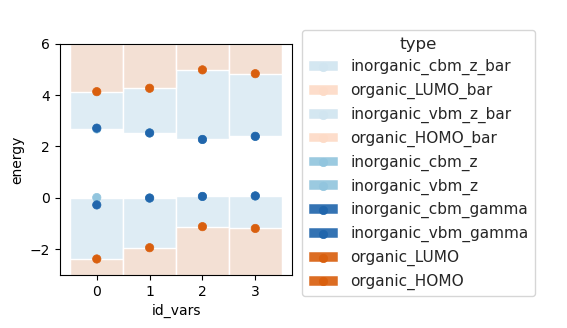

In [ ]:
fig5 = plot_energy_level_alignment_bars([hse_frontier_dataframe,], identifier_list=[56,26,175,35849], y_lim=(-3,6))

#fig5.savefig('../rawfigures/energy-level-alignment-bars.svg')

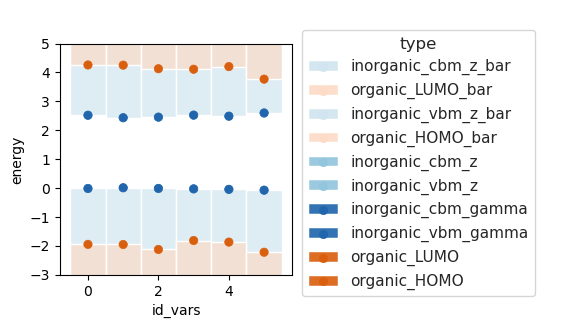

In [37]:
fig4 = plot_energy_level_alignment_bars([hse_frontier_dataframe,], identifier_list=[26,22,62,63,64,60], y_lim=(-3,5))

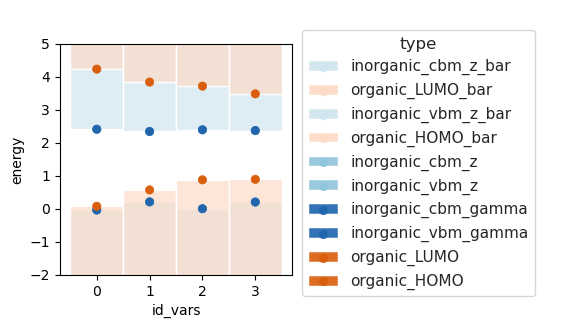

In [19]:
fig5 = plot_energy_level_alignment_bars([hse_frontier_dataframe,], identifier_list=[205,189,206,179])
fig5.savefig('../rawfigures/energy-level-alignment-bars-2.svg')
